#**THE SPARKS FOUNDATION**

#**Graduate Rotational Internship Program**

##***Data Science And Business Analytics Tasks***

###**Author: Akash Jain**


##**TASK 3 - Exploratory Data Analysis - Retail**

* Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’.
* Dataset can be found at https://bit.ly/3i4rbWI
* As a business manager, try to find out the weak areas where you can work to make more profit.
* What all business problems you can derive by exploring the data?



#**Exploratory Data Analysis**
Exploratory Data Analysis (EDA) refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

#**Step1: Data Preparation And Processing**
#Import the required libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#Loading dataset


In [2]:
df=pd.read_csv('/content/drive/MyDrive/dataset/SampleSuperstore.csv')

# Display first 5 rows of the dataset


In [3]:
df.head() 

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


# Check no of rows and columns in the dataset


In [4]:
df.shape 

(9994, 13)

There are 150 rows and 4 columns in the dataframe

# Check if there are missing values on any columns and their data type


In [5]:
df.isna().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

No missing values in the dataframe

# Display the full summary of the dataframe

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [7]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [8]:
df.describe().round(2)

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.00,9994.00,9994.00,9994.00,9994.00
mean,55190.38,229.86,3.79,0.16,28.66
std,32063.69,623.25,2.23,0.21,234.26
min,1040.00,0.44,1.00,0.00,-6599.98
25%,23223.00,17.28,2.00,0.00,1.73
50%,56430.50,54.49,3.00,0.20,8.67
75%,90008.00,209.94,5.00,0.20,29.36
max,99301.00,22638.48,14.00,0.80,8399.98


In [9]:
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

#**Step2: Data Cleaning**

#Handling duplicate values

In [10]:
df.duplicated().sum()

17

In [11]:
# Display duplicate data
df[df.duplicated()]

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
950,Standard Class,Home Office,United States,Philadelphia,Pennsylvania,19120,East,Office Supplies,Paper,15.552,3,0.2,5.4432
3406,Standard Class,Home Office,United States,Columbus,Ohio,43229,East,Furniture,Chairs,281.372,2,0.3,-12.0588
3670,Standard Class,Consumer,United States,Salem,Oregon,97301,West,Office Supplies,Paper,10.368,2,0.2,3.6288
4117,Standard Class,Consumer,United States,Los Angeles,California,90036,West,Office Supplies,Paper,19.440,3,0.0,9.3312
4553,Standard Class,Consumer,United States,San Francisco,California,94122,West,Office Supplies,Paper,12.840,3,0.0,5.7780
5905,Same Day,Home Office,United States,San Francisco,California,94122,West,Office Supplies,Labels,41.400,4,0.0,19.8720
6146,Standard Class,Corporate,United States,San Francisco,California,94122,West,Office Supplies,Art,11.760,4,0.0,3.1752
6334,Standard Class,Consumer,United States,New York City,New York,10011,East,Office Supplies,Paper,49.120,4,0.0,23.0864
6357,Standard Class,Corporate,United States,Seattle,Washington,98103,West,Office Supplies,Paper,25.920,4,0.0,12.4416
7608,Standard Class,Consumer,United States,San Francisco,California,94122,West,Office Supplies,Paper,25.920,4,0.0,12.4416


In [12]:
# Removing duplicate values
df.drop_duplicates(subset=None,keep='first',inplace=True)
df.duplicated().sum()

0

#Dropping Irrelevant Columns

In [13]:
df_retail=df.copy()

In [14]:
df_retail=df_retail.drop(['Postal Code','Country'],axis=1)

In [15]:
df_retail.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


#**Step3: Data Correlation**

In [16]:
# Correlation Analysis
corr_mat = df_retail.corr()
corr_mat

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200722,-0.028311,0.479067
Quantity,0.200722,1.000000,0.008678,0.066211
Discount,-0.028311,0.008678,1.000000,-0.219662
Profit,0.479067,0.066211,-0.219662,1.000000


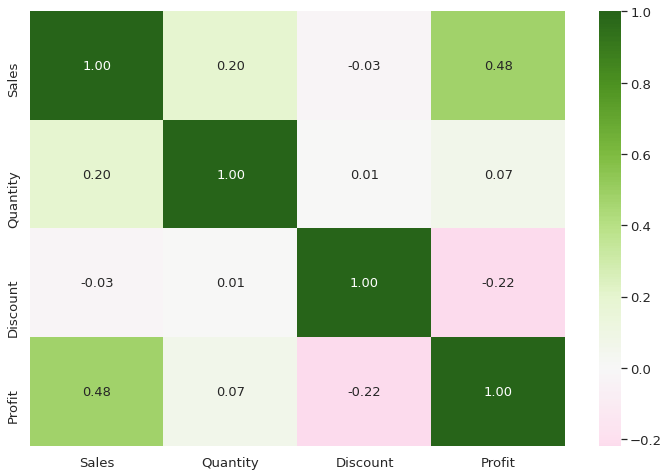

In [17]:
#create a heatmap to demonstrate the correlation magnitude among the variables
sns.set(font_scale=1.2)
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(corr_mat, xticklabels=corr_mat.columns, yticklabels=corr_mat.columns, annot=True, annot_kws={'fontsize':13},
            fmt=".2f", cmap='PiYG', center=0)

#Heatmap observations
* Sales and Profit are 48% correlated
* Discount and Profit are negatively correlated
* Quantity is negatively correlated with Discount

#**Step4: Removing Outliers**

#**Z-score**

* The Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured. 
* While calculating the Z-score we re-scale and center the data and look for data points that are too far from zero.
*  These data points which are way too far from zero will be treated as the outliers. 
* In most of the cases, a threshold of 3 or -3 is used i.e if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.

In [18]:
# Calculating Z-score
sorted_data = df_retail.sort_values(by='Sales', ascending = False)
sorted_data['Z-Score'] = (sorted_data.Sales - sorted_data.Sales.mean()) / sorted_data.Sales.std()
sorted_data.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Z-Score
2697,Standard Class,Home Office,Jacksonville,Florida,South,Technology,Machines,22638.480,6,0.5,-1811.0784,35.926827
6826,Standard Class,Corporate,Lafayette,Indiana,Central,Technology,Copiers,17499.950,5,0.0,8399.9760,27.688325
8153,First Class,Consumer,Seattle,Washington,West,Technology,Copiers,13999.960,4,0.0,6719.9808,22.076861
2623,First Class,Home Office,New York City,New York,East,Technology,Copiers,11199.968,4,0.2,3919.9888,17.587690
4190,Standard Class,Consumer,Newark,Delaware,East,Technology,Copiers,10499.970,3,0.0,5039.9856,16.465398


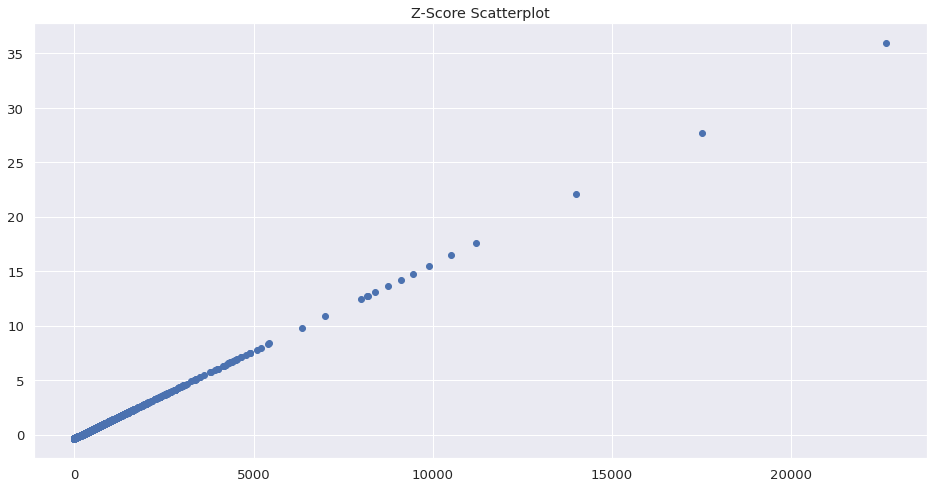

In [19]:
# Z-score Scatterplot
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(sorted_data['Sales'], sorted_data['Z-Score'])
plt.title('Z-Score Scatterplot')
plt.show()

In [20]:
# Z-score threshold=3
sorted_data = sorted_data[sorted_data['Z-Score']<3]
sorted_data.head(10)

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Z-Score
6467,Standard Class,Home Office,Providence,Rhode Island,East,Office Supplies,Storage,2079.400,5,0.0,582.2320,2.964867
949,Standard Class,Home Office,Philadelphia,Pennsylvania,East,Furniture,Tables,2065.320,12,0.4,-619.5960,2.942293
3628,Standard Class,Consumer,Seattle,Washington,West,Office Supplies,Binders,2060.744,7,0.2,643.9825,2.934956
3043,Same Day,Home Office,Long Beach,California,West,Furniture,Chairs,2054.272,8,0.2,256.7840,2.924580
8168,Standard Class,Home Office,Seattle,Washington,West,Furniture,Tables,2036.860,7,0.0,366.6348,2.896664
9615,First Class,Corporate,Seattle,Washington,West,Office Supplies,Binders,2033.584,2,0.2,762.5940,2.891411
3150,First Class,Consumer,Newark,Ohio,East,Technology,Accessories,2025.360,6,0.2,607.6080,2.878226
9490,Standard Class,Consumer,San Francisco,California,West,Office Supplies,Binders,2022.272,8,0.2,682.5168,2.873275
6879,Second Class,Home Office,Seattle,Washington,West,Furniture,Chairs,2003.920,5,0.2,125.2450,2.843852
5918,Standard Class,Consumer,New York City,New York,East,Furniture,Bookcases,2003.920,5,0.2,-25.0490,2.843852


In [21]:
df_retail=sorted_data
df_retail=df_retail.drop(['Z-Score'],axis=1)
df_retail.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
6467,Standard Class,Home Office,Providence,Rhode Island,East,Office Supplies,Storage,2079.400,5,0.0,582.2320
949,Standard Class,Home Office,Philadelphia,Pennsylvania,East,Furniture,Tables,2065.320,12,0.4,-619.5960
3628,Standard Class,Consumer,Seattle,Washington,West,Office Supplies,Binders,2060.744,7,0.2,643.9825
3043,Same Day,Home Office,Long Beach,California,West,Furniture,Chairs,2054.272,8,0.2,256.7840
8168,Standard Class,Home Office,Seattle,Washington,West,Furniture,Tables,2036.860,7,0.0,366.6348


#**Step5: Exploratory Data Analysis**

#**Univariate Analysis**
#Bar graph to represent the feature counts



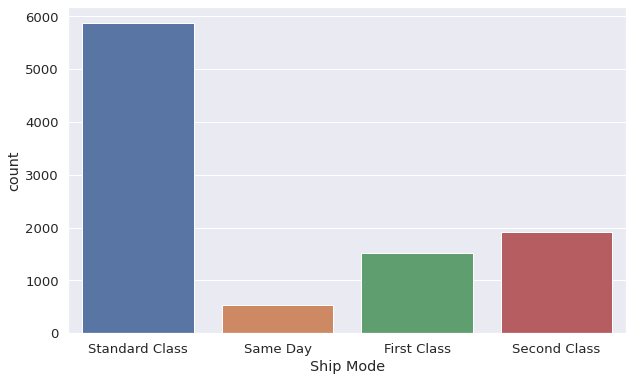

In [22]:
plt.figure(figsize=(10,6))
sns.countplot(x=df_retail['Ship Mode'])

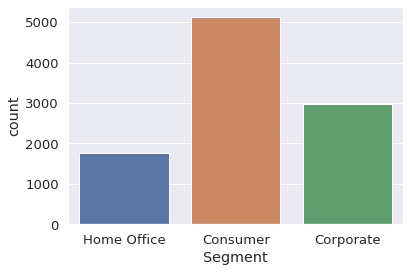

In [23]:
sns.countplot(x=df_retail['Segment'])

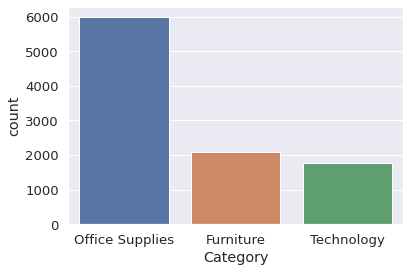

In [24]:
sns.countplot(x=df_retail['Category'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text major ticklabel objects>)

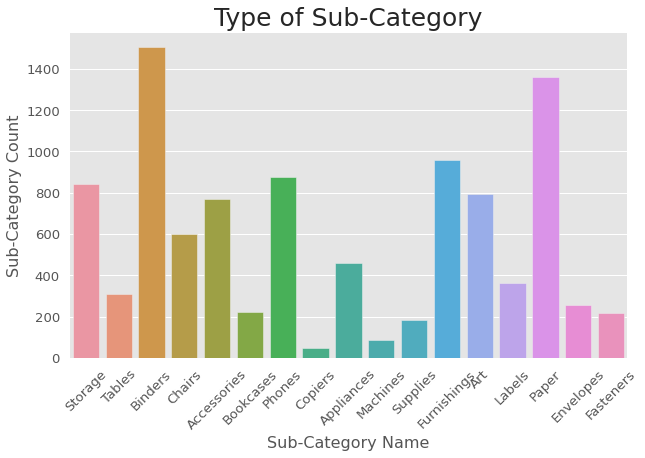

In [25]:
plt.style.use('ggplot')
plt.figure(figsize= (10,6))
ax = sns.countplot(x = "Sub-Category", data = df_retail)
ax.set_title("Type of Sub-Category", fontsize = 25)
ax.set_xlabel("Sub-Category Name", fontsize = 16,)
ax.set_ylabel("Sub-Category Count", fontsize = 16)
plt.xticks(rotation=45)

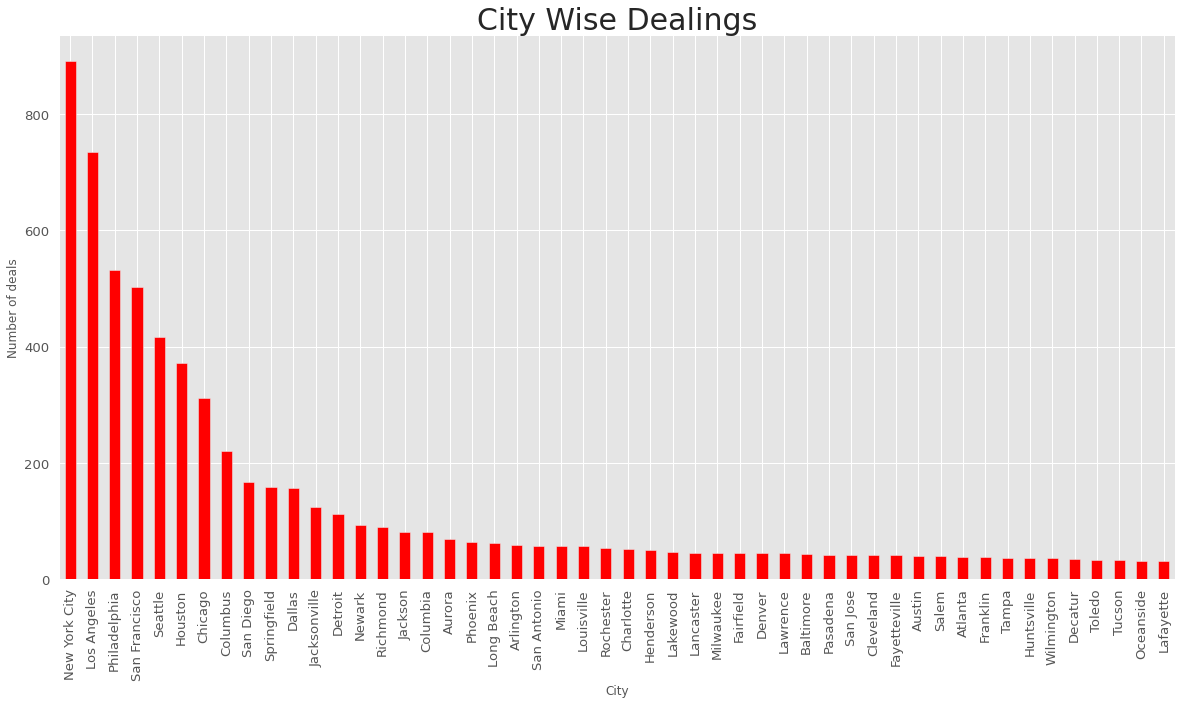

In [26]:
df_city = df_retail['City'].value_counts()
df_city=df_city.head(50)
df_city.plot(kind='bar',figsize=(20,10),color='red')
plt.ylabel('Number of deals')
plt.xlabel('City')
plt.title('City Wise Dealings', fontsize = 30)
plt.show()


#**Observation 1**
* New York City has highest sales in the world followed by Los Angeles and Philadelphia.

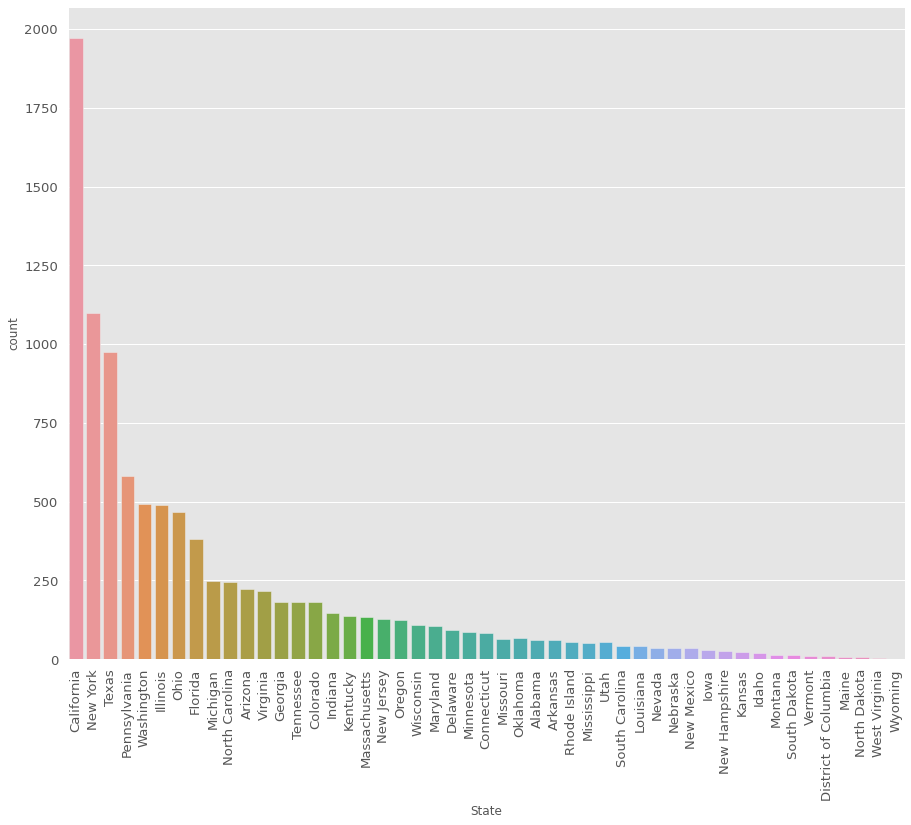

In [27]:
plt.figure(figsize=(15,12))
sns.countplot(x='State',data=df_retail,order=df['State'].value_counts().index)
plt.xticks(rotation=90)

plt.show()

#**Observation 2**
* California and New York States has the highest sales around the world

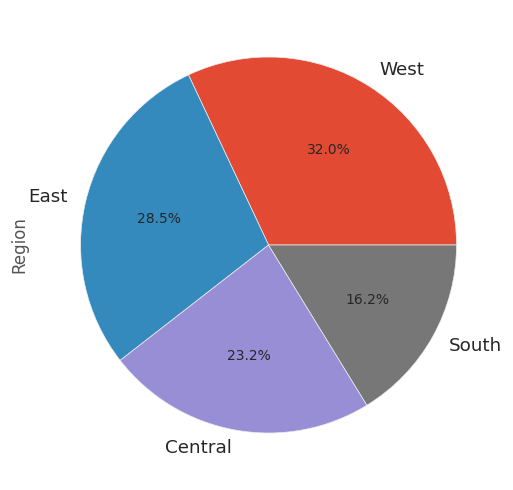

In [28]:
plt.figure(figsize =(14, 5), dpi=100)
df['Region'].value_counts().plot.pie(autopct = '%1.1f%%')
plt.tight_layout();

#**Observation 3**

* The sales is higher in Western Region
* The sales is lower in South Region

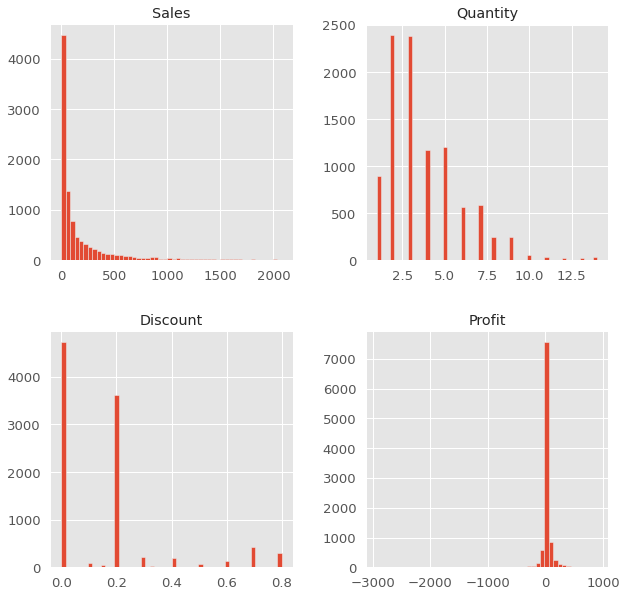

In [29]:
df_retail.hist(figsize=(10,10),bins=50)
plt.show()

#**Observation 4**
* Most customers tends to buy quantity of 2 and 3
* Discount give maximum is 0 to 20 percent 


#Multivariate Analysis

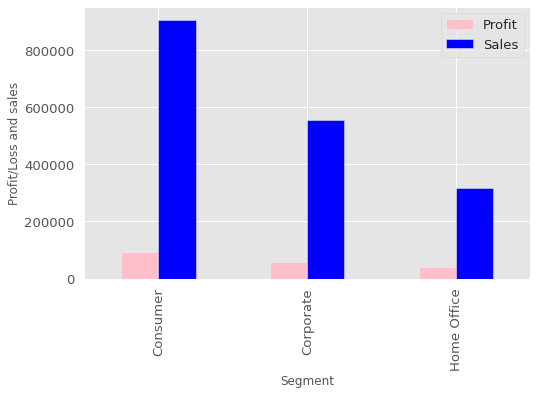

In [30]:
df_retail.groupby('Segment')[['Profit','Sales']].sum().plot.bar(color=['pink','blue'],figsize=(8,5))
plt.ylabel('Profit/Loss and sales')
plt.show()

#**Observation 5**
* There is higher sales and profit of Consumer and the Home Office has the least sales and profit in relation to segments.

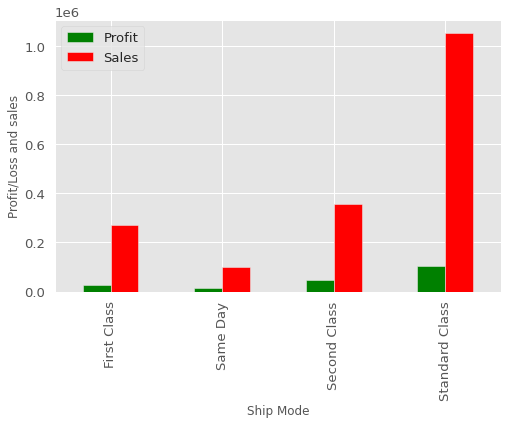

In [31]:
df_retail.groupby('Ship Mode')[['Profit','Sales']].sum().plot.bar(color=['green','red'],figsize=(8,5))
plt.ylabel('Profit/Loss and sales')
plt.show()

#**Observation 6**
* There is higher sales when products are shipperd using Standard class ship mode.
* People uses Standard Class more than any other ship mode.
* Same Day ship mode is least used by customers.

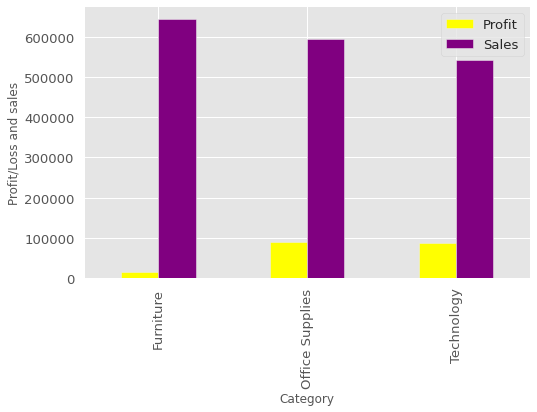

In [32]:
df_retail.groupby('Category')[['Profit','Sales']].sum().plot.bar(color=['yellow','purple'],figsize=(8,5))
plt.ylabel('Profit/Loss and sales')
plt.show()

#**Observation 7**
* Technology category has the lowest sale but high profit
* Furniture category has high sales but less profit.


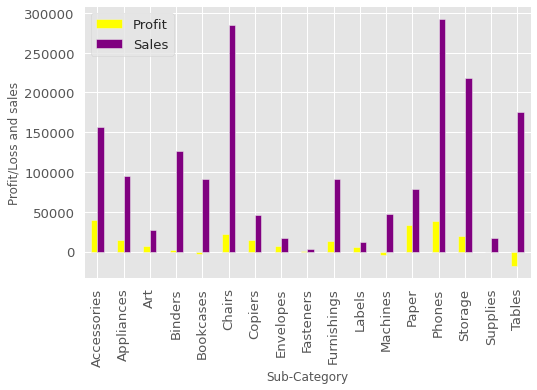

In [33]:
df_retail.groupby('Sub-Category')[['Profit','Sales']].sum().plot.bar(color=['yellow','purple'],figsize=(8,5))
plt.ylabel('Profit/Loss and sales')
plt.show()

#**Observation 8**
* Phones and Chairs has same no of sales but phone creates more profit than chairs.
* Fasteners has least sales with no profit.
* Bookcases and tables has good sales but there is loss.

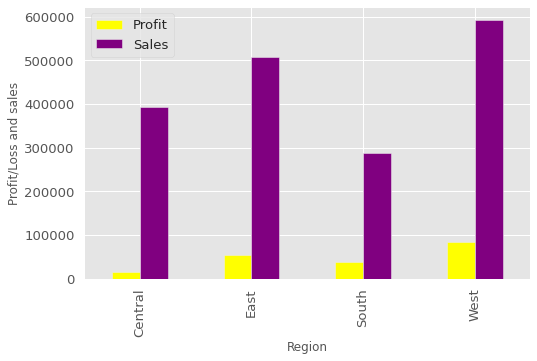

In [34]:
df_retail.groupby('Region')[['Profit','Sales']].sum().plot.bar(color=['yellow','purple'],figsize=(8,5))
plt.ylabel('Profit/Loss and sales')
plt.show()

#**Observation 9**
* The sales profit ratio is highest in West Region 
* The sales profit ratio is least in Central Region


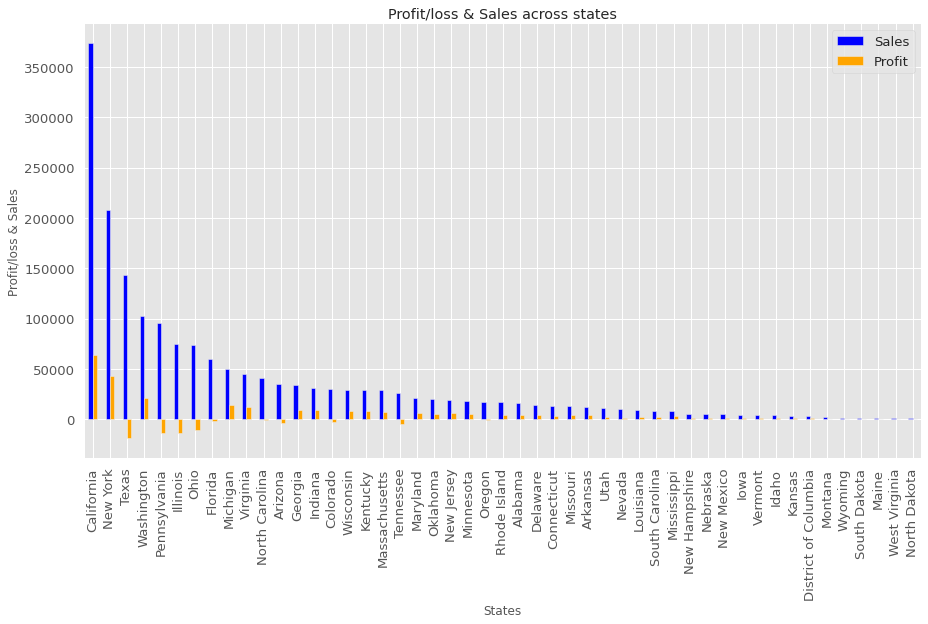

In [35]:
ps = df_retail.groupby('State')[['Sales','Profit']].sum().sort_values(by='Sales',ascending=False)
ps[:].plot.bar(color=['blue','orange'],figsize=(15,8))
plt.title('Profit/loss & Sales across states')
plt.xlabel('States')
plt.ylabel('Profit/loss & Sales')
plt.show()

#**Observation 10**
* California and New York has high sales-profit ratio 
* Texas is 3rd country with high sales but there is a loss.


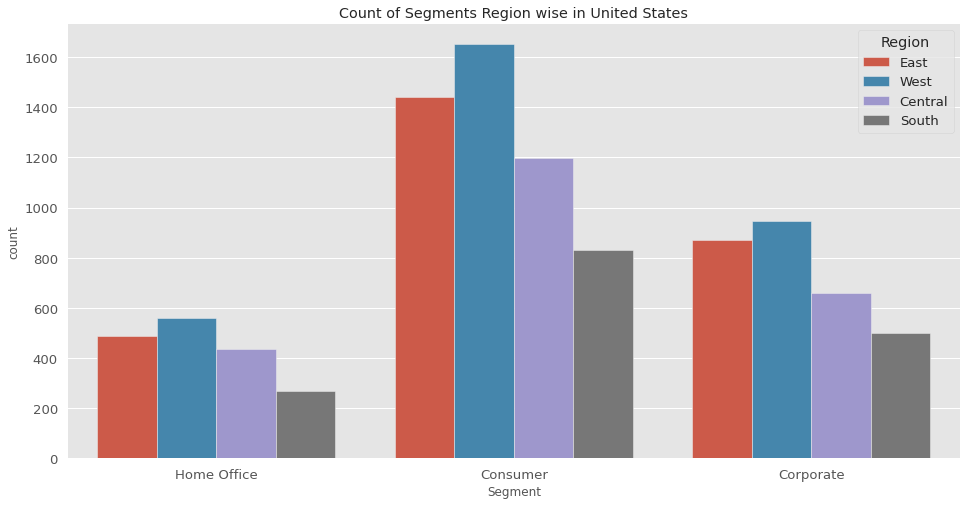

In [36]:
# Count of Segment region wise
plt.figure(figsize=(16,8))
sns.countplot(x="Segment", hue="Region", data=df_retail)
plt.title('Count of Segments Region wise in United States')
plt.show()

#**Observation 11**
* Consumer segment has a good record of sales in all regions.
* Home Office has least sales in all regions.

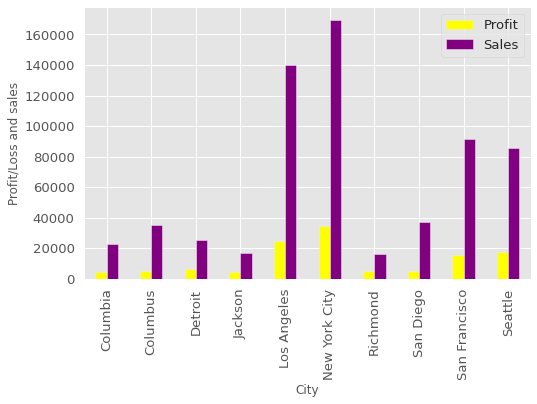

In [37]:
# Top 10 City wise Profit and Sales
df_retail_top_10_cities = df_retail.groupby("City")[["Profit", "Sales"]].sum().reset_index().sort_values(by="Profit",ascending=False)
new_df=df_retail_top_10_cities.head(10)
new_df.groupby('City')[['Profit','Sales']].sum().plot.bar(color=['yellow','purple'],figsize=(8,5))
plt.ylabel('Profit/Loss and sales')
plt.show()

#**Observation 12**
* New York City and Los Angeles has highest sales-profit ratio


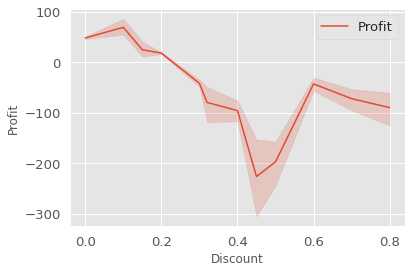

In [38]:
sns.lineplot(x='Discount',y='Profit',label='Profit',data=df_retail)
plt.legend()
plt.show()

#**Observation 13**
* Upto 0-10% discount and more than 60% discount generates profit
* 40% discount has very less profit 


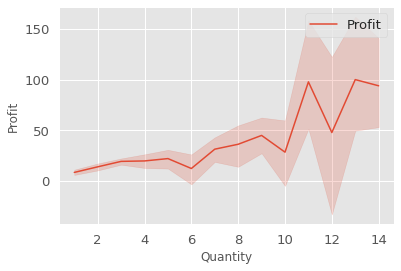

In [39]:
sns.lineplot(x='Quantity',y='Profit',label='Profit',data=df_retail)
plt.legend()
plt.show()

#**Observation 14**
* Items more than 10 slightly tends to have more profit 

#**Pairplot For Showing The Relationship And Distributions**

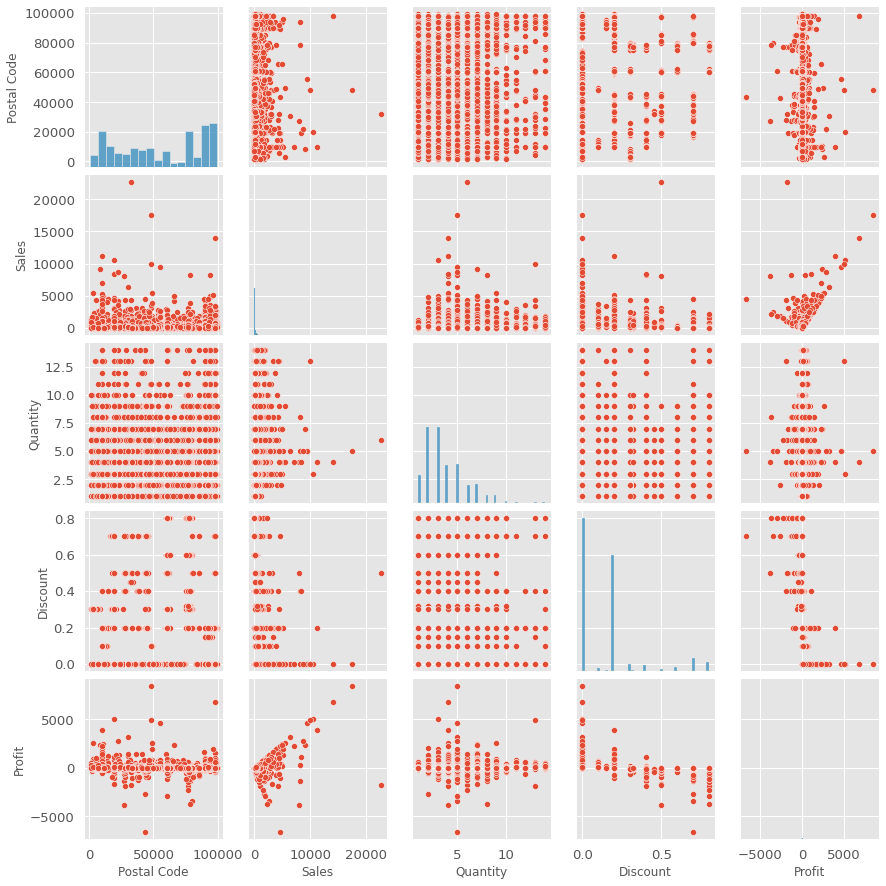

In [40]:
sns.pairplot(df)

#**These are the business problems we figured out with Eda**

#**Thank You!!!**